# Movie Analysis: Exploratory Data Analysis

## About:
This notebook contains the process used for exploring the data, which in turn should provide insights into the following questions:

1. What genre to choose
2. Which director to hire 
3. When to release the film
4. What content to include

In [1]:
# import notebook dependencies:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style("darkgrid")
sns.set_context('talk')
%matplotlib inline

## 1. Which genres generate the most revenue:
Genres are a great way to focus on making a profitable film. Most films are given more than one genre, so we will analyze the genres in two different ways; as a group, and as single elements.

### a. Which genre groups generate the most revenue:

Bringing in the pre-processed data set:

In [2]:
main_df_path = os.path.join(os.pardir, 'data', 'processed', 'combined.csv')
main_df = pd.read_csv(main_df_path)

Making sure it looks like it should:

In [3]:
main_df.head(3)

,imdb_id,title,year,director,production_co,rank,budget_usd,us_gross,revenue,popular,genres,date,month
0,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,J.J. Abrams,Lucasfilm,519,245000000.0,937000000.0,692000000.0,True,"Action,Adventure,Sci-Fi",2015-12-15,December
1,tt4154796,Avengers: Endgame,2019,Anthony Russo,Marvel Studios,111,356000000.0,858000000.0,502000000.0,True,"Action,Adventure,Drama",2019-04-24,April
2,tt0499549,Avatar,2009,James Cameron,Twentieth Century Fox,533,237000000.0,761000000.0,524000000.0,True,"Action,Adventure,Fantasy",2009-12-10,December


Sort values by revenue:

In [4]:
main_df = main_df.sort_values('revenue', ascending=False)

In [5]:
main_df.head(3)

,imdb_id,title,year,director,production_co,rank,budget_usd,us_gross,revenue,popular,genres,date,month
0,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,J.J. Abrams,Lucasfilm,519,245000000.0,937000000.0,692000000.0,True,"Action,Adventure,Sci-Fi",2015-12-15,December
2,tt0499549,Avatar,2009,James Cameron,Twentieth Century Fox,533,237000000.0,761000000.0,524000000.0,True,"Action,Adventure,Fantasy",2009-12-10,December
6,tt0369610,Jurassic World,2015,Colin Trevorrow,Universal Pictures,1115,150000000.0,652000000.0,502000000.0,True,"Action,Adventure,Sci-Fi",2015-06-06,June


Focusing on the top 20 genre combinations:

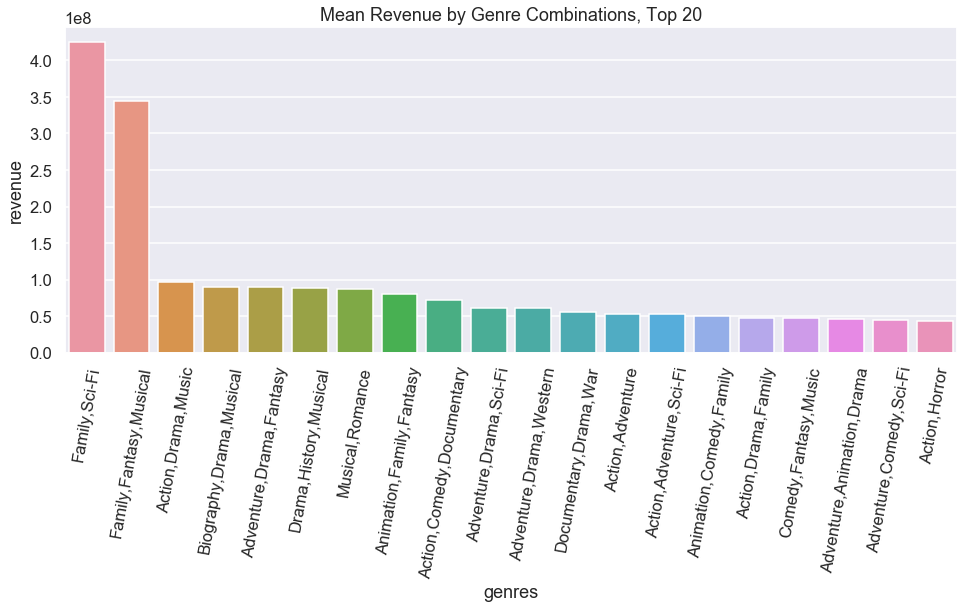

In [6]:
plt.figure(figsize=(16, 6))
top_grouped_genres = main_df.groupby('genres')['genres', 'revenue'].mean(
).sort_values('revenue', ascending=False).head(20).reset_index()
ax = sns.barplot(x='genres', y='revenue', data=top_grouped_genres)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
plt.title('Mean Revenue by Genre Combinations, Top 20');

Seems strange to have such a large difference between the first three, what is the distribution for each grouping?

In [7]:
top_genres = list(top_grouped_genres['genres'])

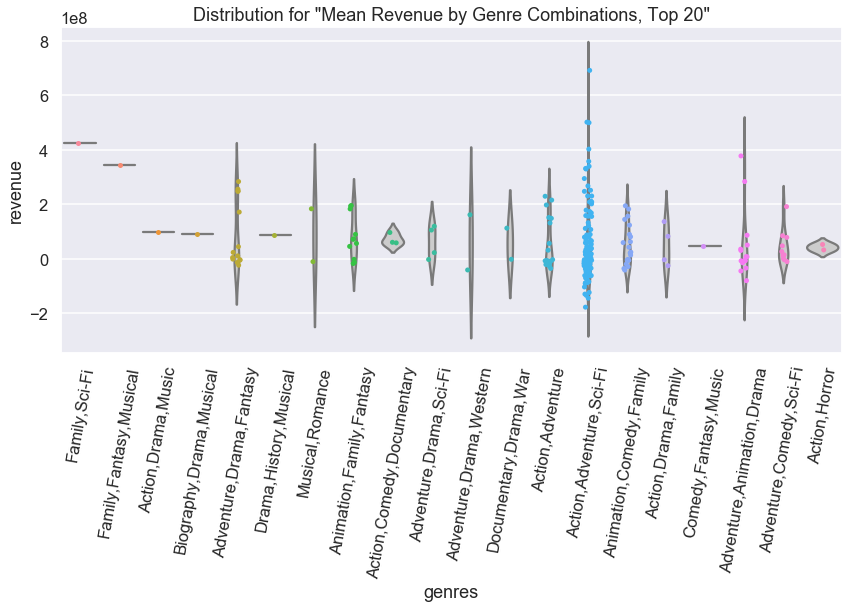

In [8]:
fig = plt.figure(figsize=(14, 6))
ax = sns.violinplot(x="genres", y="revenue", data=main_df[main_df['genres'].isin(top_genres)],
                    inner=None, color=".8", order=top_genres)
ax = sns.stripplot(x="genres", y="revenue", data=main_df[main_df['genres'].isin(
    top_genres)], order=top_genres)
ax.set_title('Distribution for "Mean Revenue by Genre Combinations, Top 20"')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);

This graph is telling us that these groupings are so specific, the top four genres each are based on only one movie:

In [9]:
main_df[main_df['genres'] == 'Family,Sci-Fi']

,imdb_id,title,year,director,production_co,rank,budget_usd,us_gross,revenue,popular,genres,date,month
22,tt0083866,E.T. the Extra-Terrestrial,1982,Steven Spielberg,Universal Pictures,1260,10000000.0,435000000.0,425000000.0,True,"Family,Sci-Fi",1982-06-11,June


In [10]:
main_df[main_df['genres'] == 'Action,Drama,Music']

,imdb_id,title,year,director,production_co,rank,budget_usd,us_gross,revenue,popular,genres,date,month
538,tt0103855,The Bodyguard,1992,Mick Jackson,Kasdan Pictures,4113,25000000.0,122000000.0,97000000.0,False,"Action,Drama,Music",1992-11-25,November


I'm not a fan of using the genres grouped together like this. 

Perhaps we will have better luck with splitting up the genres.

### b. Which individual genres make the most profit:

Let me explode the dataframe so each genre is on its own row:

In [11]:
main_df['genres'] = main_df['genres'].str.split(',')

In [12]:
exploded_main_df = main_df.explode('genres')

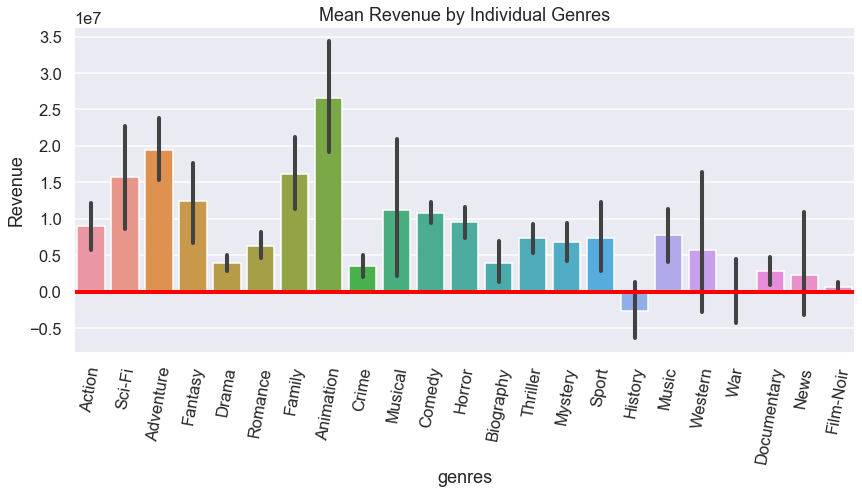

In [13]:
plt.figure(figsize=(14, 6))
data_solo_genres = exploded_main_df[['genres', 'revenue']].sort_values('revenue', ascending=False)
ax = sns.barplot(x='genres', y='revenue', data=data_solo_genres)
plt.title('Mean Revenue by Individual Genres')
plt.ylabel('Revenue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
plt.axhline(linewidth=4, color='r');

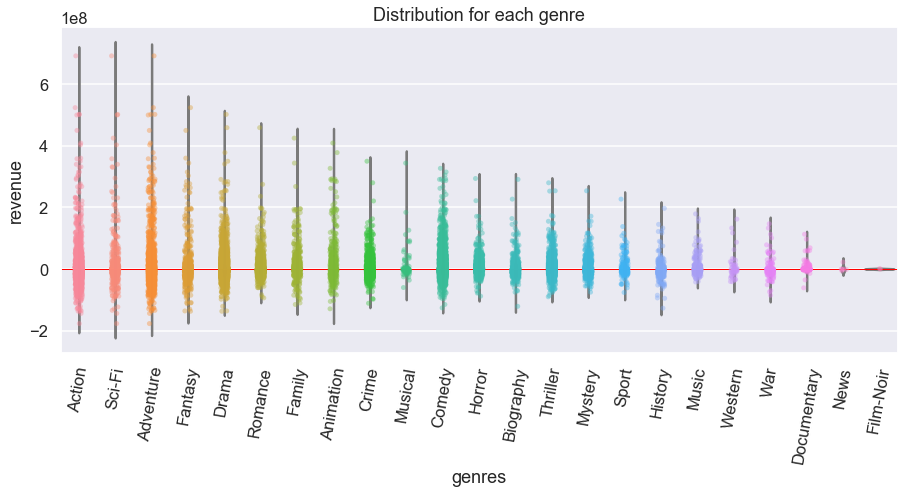

In [14]:
fig = plt.figure(figsize=(15, 6))

data = exploded_main_df[['genres', 'revenue']
                        ].sort_values('revenue', ascending=False)
ax = sns.violinplot(x="genres", y="revenue", data=data,
                    inner=None, color=".8")
ax = sns.stripplot(x="genres", y="revenue", data=data, alpha=.4)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
plt.axhline(linewidth=1, color='r')
plt.title('Distribution for each genre');

### Deeper look:

This looks like a more even distribution than it did when using genre groups instead.

Let's check out some of the genres to make sure they are correct:

In [57]:
# columns and statistics to view:
numeric_columns = ['year', 'budget_usd', 'us_gross', 'revenue']
aggregates = ['count', 'mean', 'std', 'median']

In [58]:
# explore statistical values:
exploded_main_df[exploded_main_df['genres'] ==
                 'Animation'][numeric_columns].agg(aggregates)

,year,budget_usd,us_gross,revenue
count,358.000000,3.580000e+02,3.580000e+02,3.580000e+02
mean,2004.687151,6.252854e+07,8.912995e+07,2.660141e+07
std,13.171670,5.515029e+07,1.037749e+08,7.751831e+07
median,2008.000000,5.000000e+07,5.250000e+07,1.000000e+06


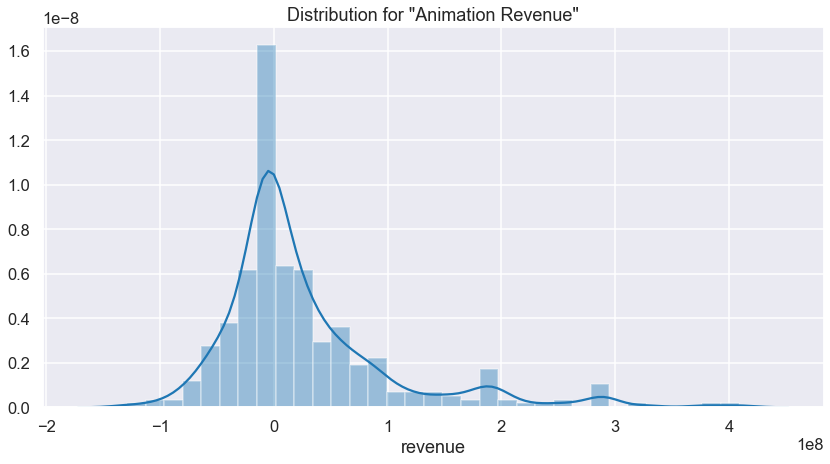

In [77]:
# distribution:
plt.figure(figsize=(14, 7))
data_genres_anim = exploded_main_df[exploded_main_df['genres']
                                    == 'Animation']['revenue']
sns.distplot(data_genres_anim)
plt.title('Distribution for "Animation Revenue"');

In [65]:
exploded_main_df[exploded_main_df['genres'] == 'Animation'].sample(3)

,imdb_id,title,year,director,production_co,rank,budget_usd,us_gross,revenue,popular,genres,date,month
1695,tt0299172,Home on the Range,2004,Will Finn,Walt Disney Pictures,8010,110000000.0,50000000.0,-60000000.0,False,Animation,2004-04-02,April
3275,tt2872750,Shaun the Sheep Movie,2015,Mark Burton,StudioCanal,10363,25000000.0,19000000.0,-6000000.0,False,Animation,2015-02-05,February
3811,tt0181739,Osmosis Jones,2001,Bobby Farrelly,Warner Bros.,2528,70000000.0,14000000.0,-56000000.0,True,Animation,2001-08-07,August


In [66]:
# explore statistical values:
exploded_main_df[exploded_main_df['genres'] ==
                 'History'][numeric_columns].agg(aggregates)

,year,budget_usd,us_gross,revenue
count,277.000000,2.770000e+02,2.770000e+02,2.770000e+02
mean,2004.277978,2.567011e+07,2.300425e+07,-2.665868e+06
std,13.326393,2.976278e+07,3.816086e+07,3.292138e+07
median,2007.000000,1.600000e+07,5.700000e+06,-4.862490e+06


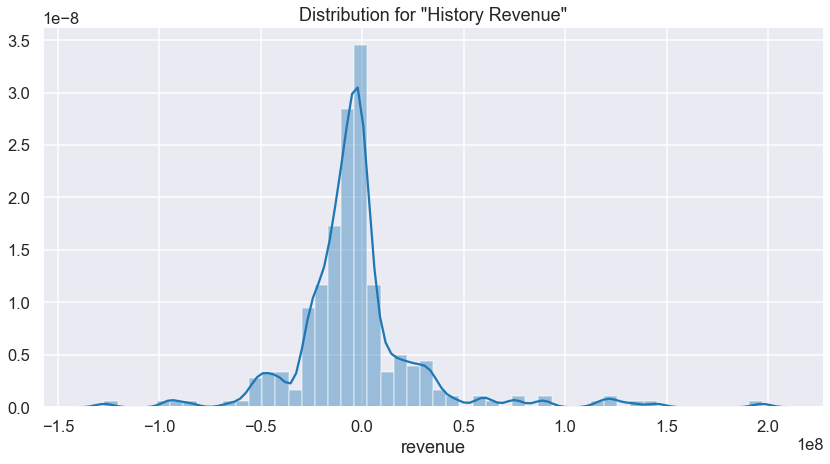

In [76]:
# distribution:
plt.figure(figsize=(14, 7))
data_genres_hist = exploded_main_df[exploded_main_df['genres']
                                    == 'History']['revenue']
sns.distplot(data_genres_hist)
plt.title('Distribution for "History Revenue"');

After analyzing the two genres, it looks like they have similar distributions (slightly skewed) and no weird outiers. From that I conclude that the results are in fact legitimate, and that no sane person would make a history movie for profit.

## 2. Which director has the highest total revenue from films:

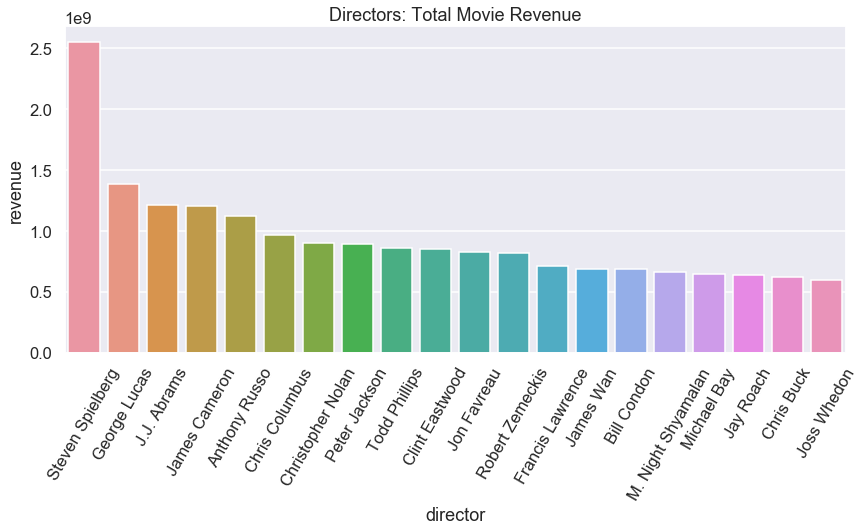

In [68]:
plt.figure(figsize=(14, 6))
data_directors = main_df.groupby('director')['revenue', 'director'].sum(
).sort_values('revenue', ascending=False).head(20).reset_index()
ax = sns.barplot(x="director", y="revenue", data=data_directors,
                 label="Mean")
plt.title("Directors: Total Movie Revenue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.axhline(linewidth=1, color='r');

Which director has the highest revenue for each individual genre:

In [31]:
# create list of genres:
genres = list(exploded_main_df['genres'].unique())

In [32]:
# use list of genres to create dictionary of dataframes:
director_genres = {}
for genre in genres:
    director_genres[genre] = exploded_main_df[exploded_main_df['genres'] == genre].groupby(
        'director').sum().sort_values('revenue', ascending=False).reset_index().head()

In [33]:
# random color generator:
N = 6
df = pd.Series(np.random.randint(10,50,N), index=np.arange(1,N+1))

cmap = plt.cm.tab10
colors = cmap(np.arange(len(df)) % cmap.N)

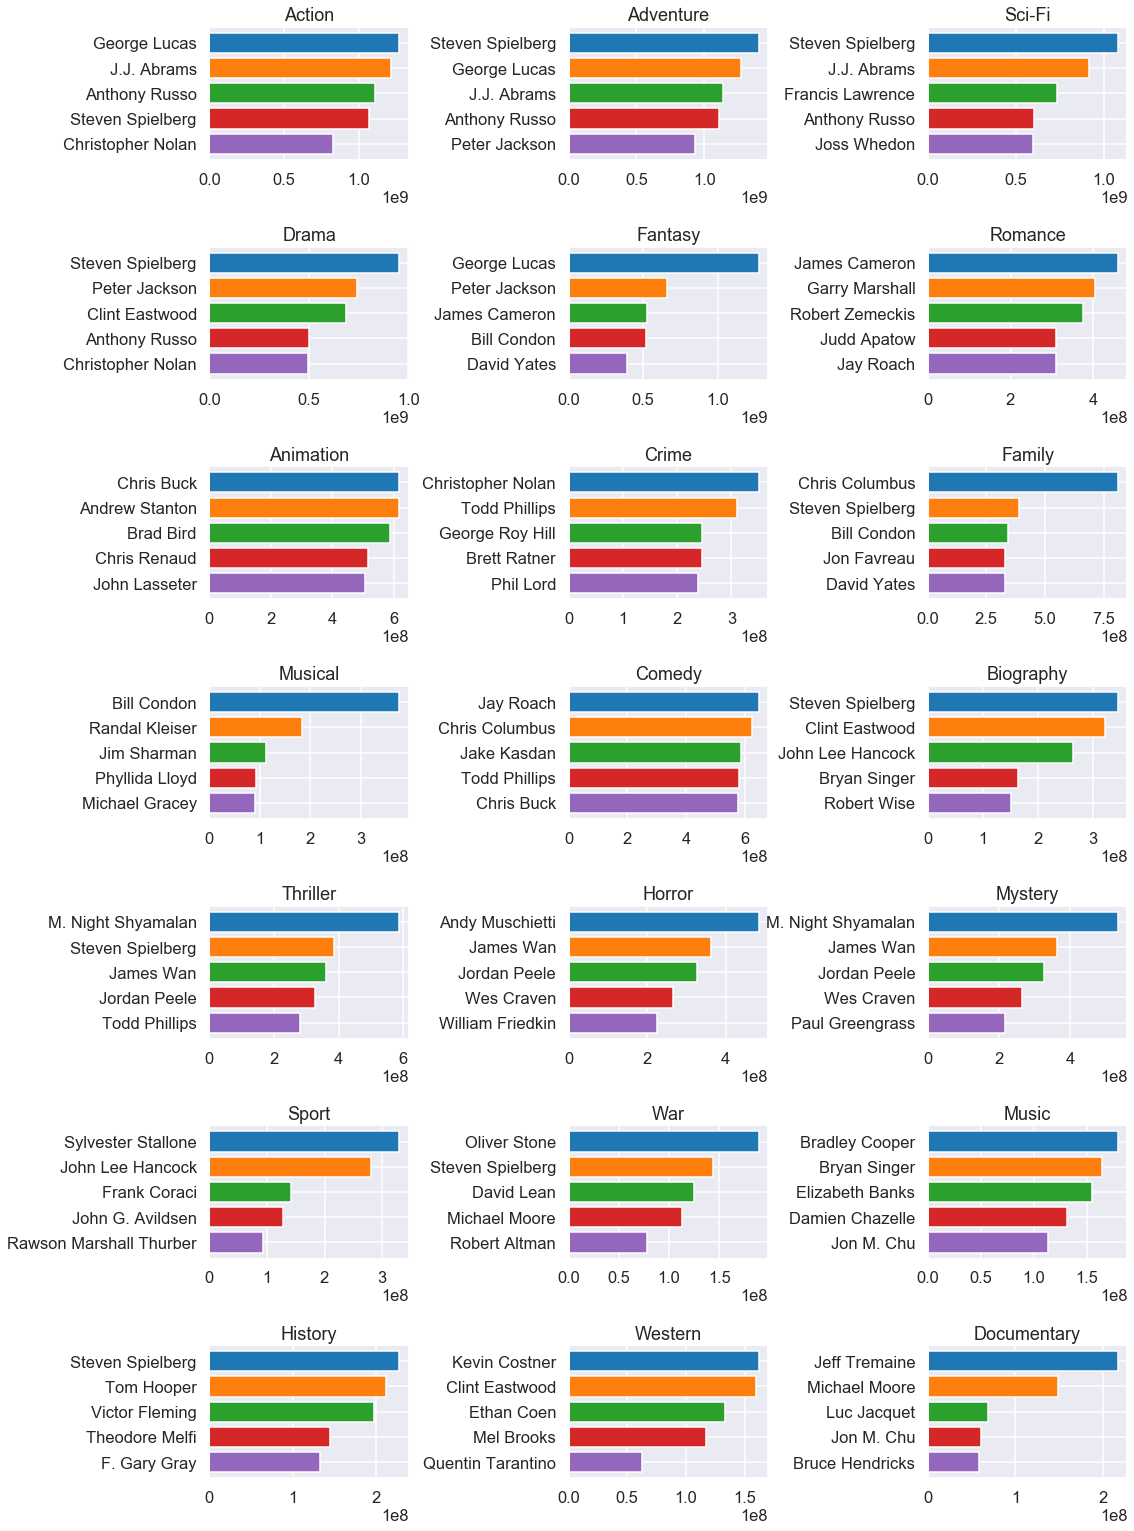

In [70]:
# use dictionary of dataframes to create subplots:
fig, ax = plt.subplots(7, 3, figsize=(15, 24))
for i, axe in enumerate(ax.flat):
    axe.barh(director_genres[genres[i]]['director'],
             director_genres[genres[i]]['revenue'], color=colors)
    axe.set_title(genres[i])
    axe.invert_yaxis()


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.65,
                    wspace=0.8)
plt.show()

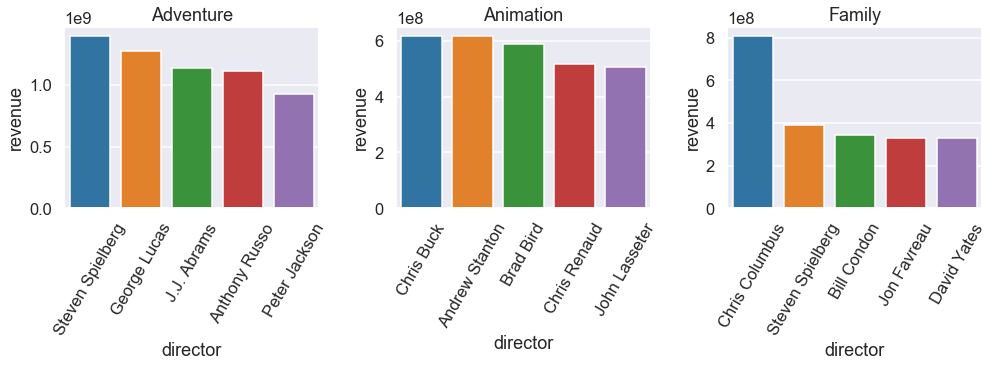

In [90]:
top_genres = ['Adventure', 'Animation', 'Family']
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
for i, axe in enumerate(ax.flat):
    sns.barplot(x="director", y="revenue", data=director_genres[top_genres[i]],
                 label="Mean", ax=axe)
    axe.set_xticklabels(axe.get_xticklabels(), rotation=60)
    axe.set_title(top_genres[i])

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.65,
                    wspace=0.3)
plt.show()

## 3. What is the best month to release a movie:

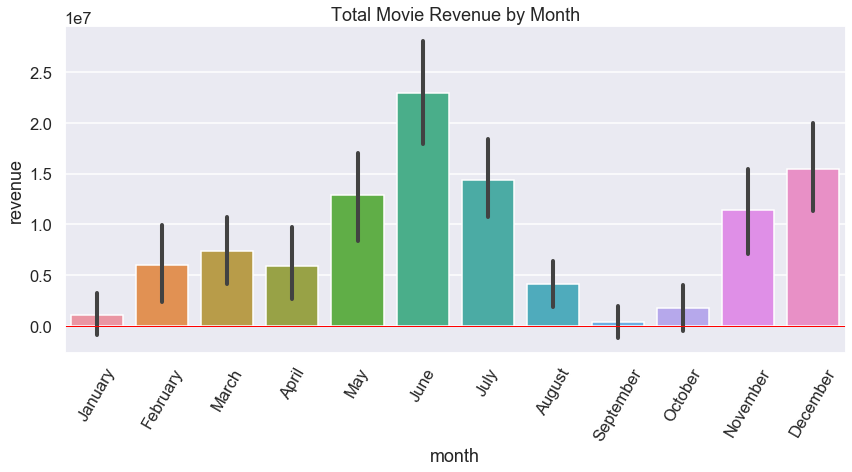

In [35]:
months_ordered = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(14, 6))
data = main_df[['month', 'revenue']].sort_values('revenue', ascending=False)

ax = sns.barplot(x="month", y="revenue", data=data,
                 label="Mean", order=months_ordered)

plt.title("Total Movie Revenue by Month")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.axhline(linewidth=1, color='r');

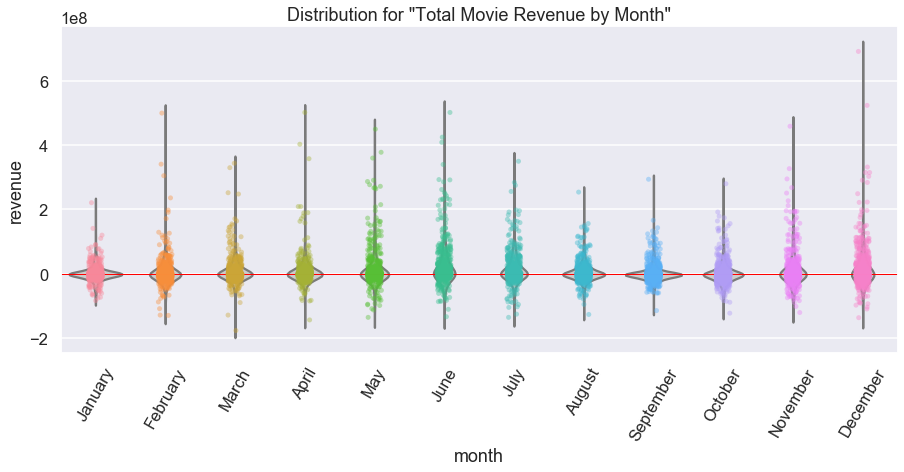

In [72]:
fig = plt.figure(figsize=(15, 6))
data = main_df[['month', 'revenue', 'popular']
               ].sort_values('revenue', ascending=False)

ax = sns.violinplot(x="month", y="revenue", data=data,
                    inner=None, color=".8", split=False, order=months_ordered)

ax = sns.stripplot(x="month", y="revenue", data=data, alpha=.4, order=months_ordered)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.axhline(linewidth=1, color='r')
plt.title('Distribution for "Total Movie Revenue by Month"');

In [37]:
# plt.figure(figsize=(14, 6))
# ax = sns.swarmplot(x="month", y="revenue",
#                    hue="popular", data=data, dodge=True)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
# plt.axhline(linewidth=1, color='r')
# plt.title('Distribution for each month');

### 4.b What is the best month to release a film within a specified genre:

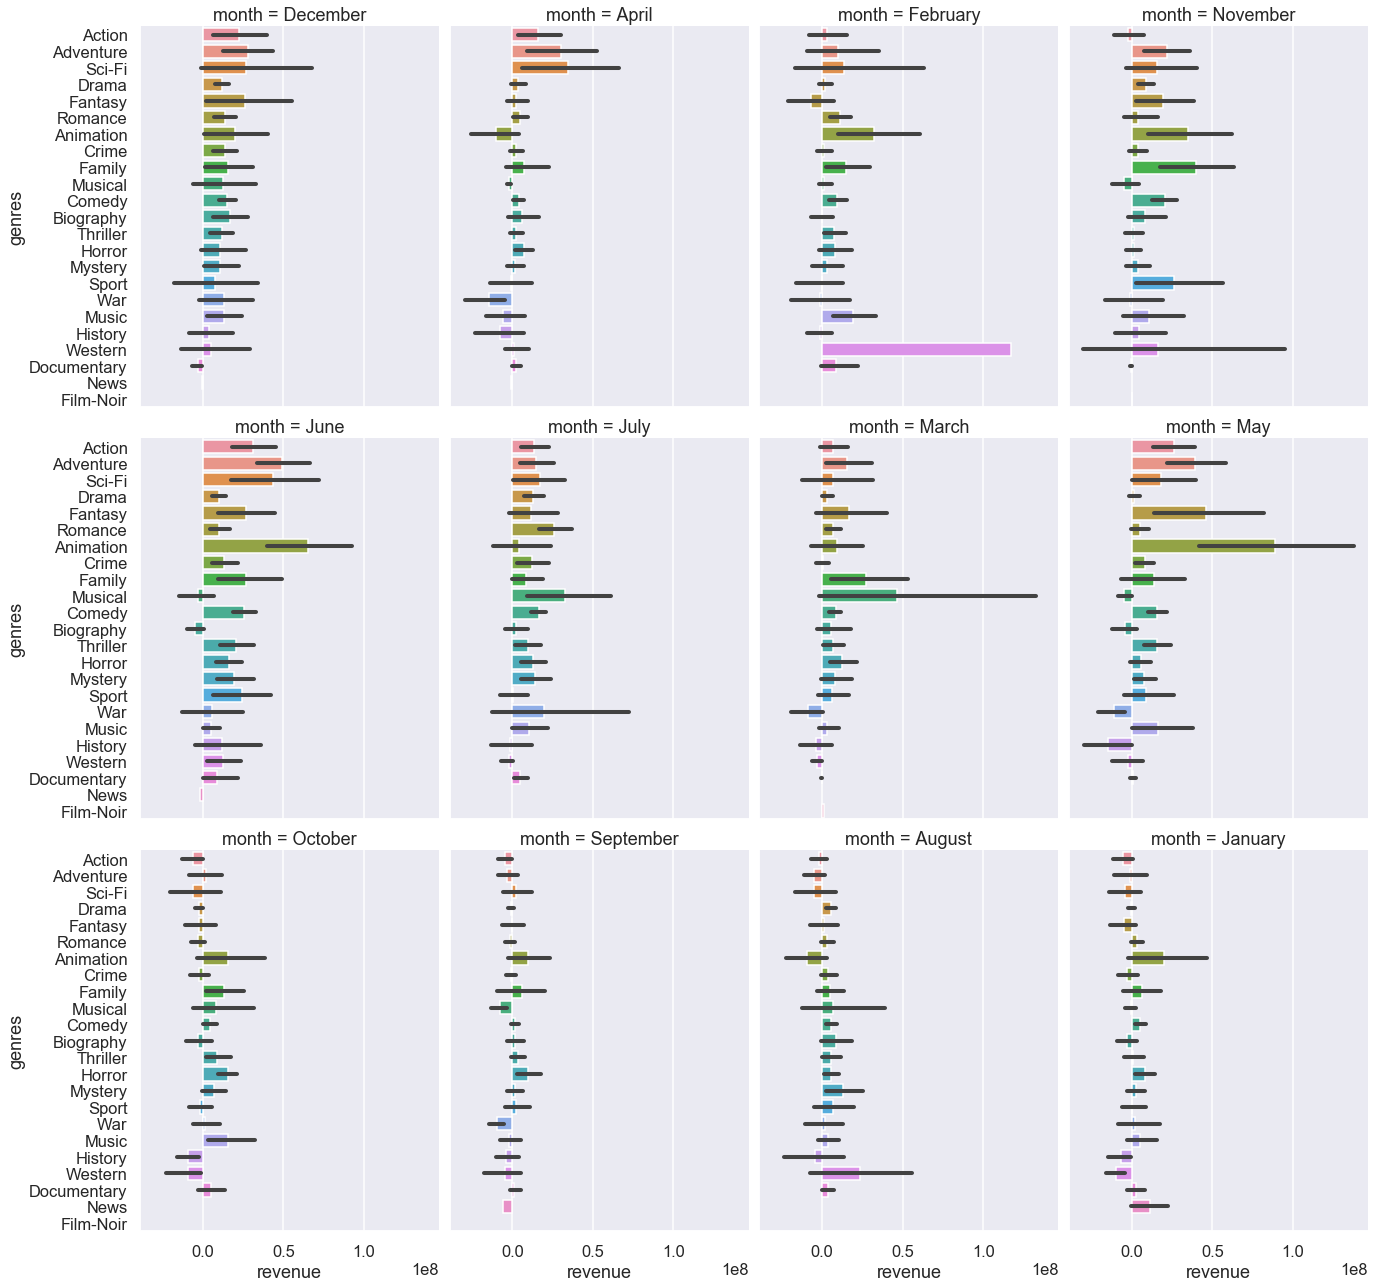

In [38]:
data = exploded_main_df[['month', 'revenue', 'genres']]
ax = sns.catplot(x="revenue", y='genres',
                col="month", data=data, kind='bar', col_wrap=4,
                height=6, aspect=.8);

## 4. What content appears most often in high revenue titles:

In [39]:
# bring in keywords:
keywords_df_path = os.path.join(os.pardir, 'data', 'processed', 'keywords.csv')
keywords_df = pd.read_csv(keywords_df_path)

In [40]:
# join keywords with main dataframe:
keywords_df = main_df.set_index('imdb_id').join(
    keywords_df.set_index('imdb_id')).reset_index()

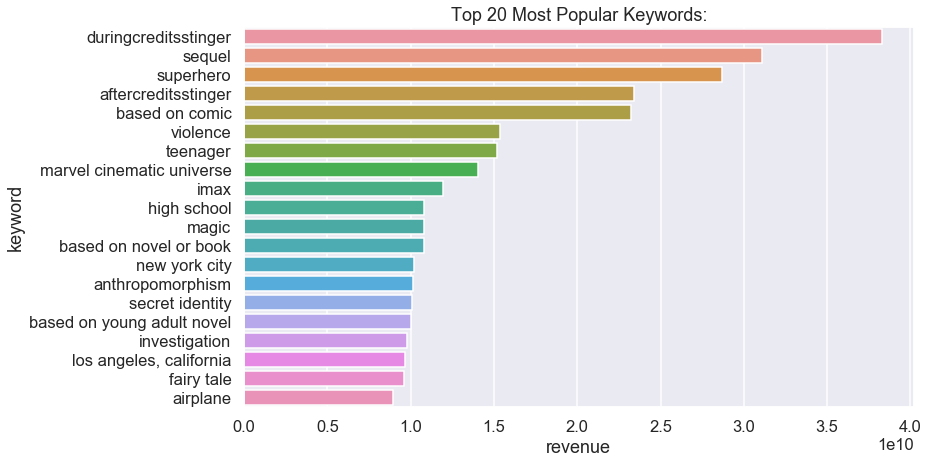

In [71]:
# plot top 20 keyword sums:
plt.figure(figsize=(12, 7))
data_keywords = keywords_df.groupby('keyword')['keyword', 'revenue'].sum().sort_values(
    ascending=False, by='revenue').head(20).reset_index()
plt.xlabel('Total revenue')
plt.title('Top 20 Most Popular Keywords:')

ax = sns.barplot(x="revenue", y="keyword", data=data_keywords,
                 label="Mean", orient='h');

### 5.b What are the most popular keywords per month:

In [53]:
# create dictionary of dataframes:
keyword_months = {}
for month in months_ordered:
    keyword_months[month] = keywords_df[keywords_df['month'] == month].groupby(
    'keyword').sum().sort_values('revenue', ascending=False).reset_index().head()

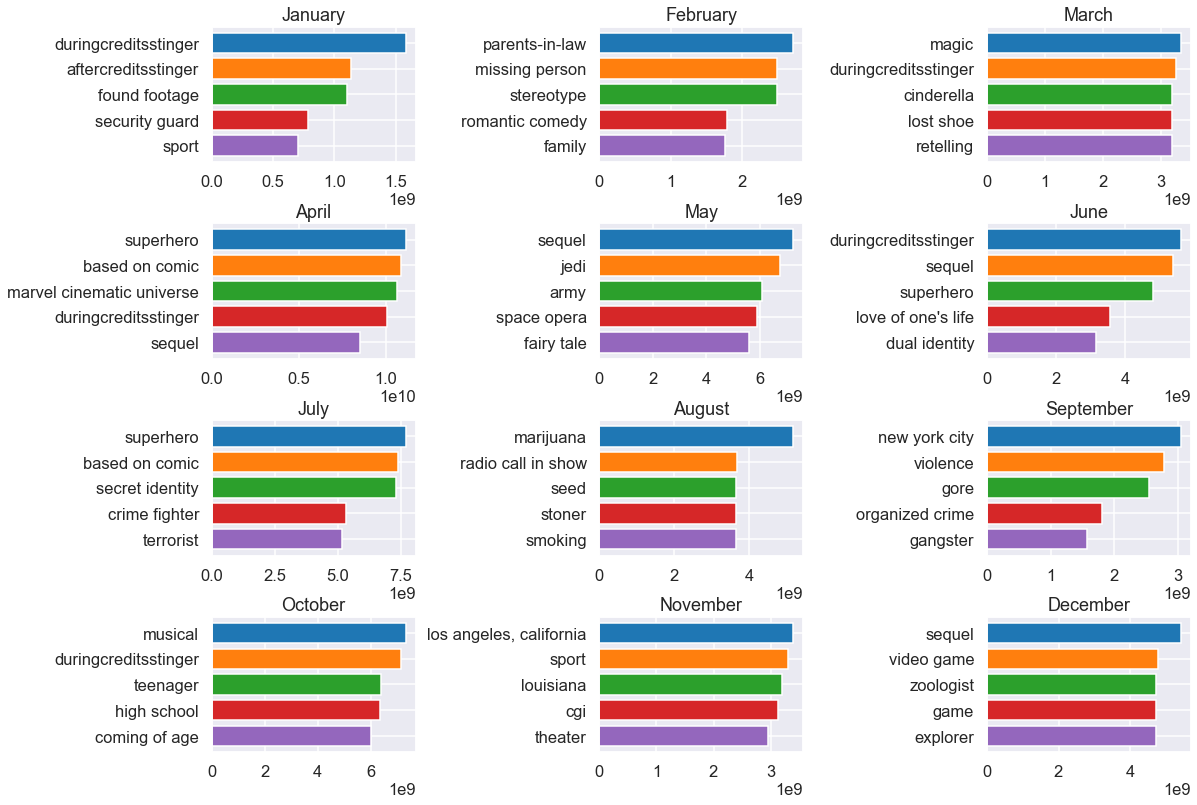

In [56]:
# use dictionary of dataframes to create subplots:
fig, ax = plt.subplots(4, 3, figsize=(16, 12))
for i, axe in enumerate(ax.flat):
    axe.barh(keyword_months[months_ordered[i]]['keyword'],
             keyword_months[months_ordered[i]]['revenue'], color=colors)
    axe.set_title(months_ordered[i])
    axe.invert_yaxis()


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.9)
plt.show()

In [ ]:
sns.pairplot(main_df[['rank', 'budget_usd', 'us_gross', 'revenue']])

## Conclusion: